In [3]:
# import
%matplotlib inline  
import matplotlib.pyplot as plt

import random
import math
import numpy as np

In [4]:
# create traders class
class RandomTrader:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
    
    def random_trade(self, S, current_step):
        buyOrSell = np.random.randint(0, 2)
        if buyOrSell == 0:
            return self.buy(S, current_step)
        elif buyOrSell == 1:
            return self.sell(S, current_step)
    
    def buy(self, S, current_step):
        if self.cash[current_step - 1] >= S[current_step - 1] * 2:
            return np.random.randint(-2, 1)
        else:
            return 0
    
    def sell(self, S, current_step):
        if self.X[current_step - 1] >= 2:
            return np.random.randint(0, 3)
        else:
            return 0

    def trade(self, S, current_step):
        self.X[current_step] =  self.X[current_step - 1] + self.random_trade(S, current_step)
        self.cash[current_step] = self.cash[current_step - 1] - self.random_trade(S, current_step) * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]
    
class TrendFollower:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 1
        self.max_leverage = 8
        self.action = np.zeros(np.shape(X))
        self.actions = np.zeros(np.shape(X))
    
    def trend_following_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] < mean:
            self.action[current_step] = -1
            self.actions[current_step] = self.sell(S, current_step)
            return self.sell(S, current_step)
        elif S[current_step - 1] > mean:
            self.action[current_step] = 1
            self.actions[current_step] = self.buy(S, current_step)
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]

    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.trend_following_trade(S, current_step)
        self.cash[current_step] = self.cash[current_step - 1] - self.trend_following_trade(S, current_step) * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_cash(self):
        return self.cash
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]
    
class MeanReversion:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 1
        self.max_leverage = 8
        self.action = np.zeros(np.shape(X))
        self.actions = np.zeros(np.shape(X))
        
    def mean_reversion_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] > mean:
            self.actions[current_step] = self.sell(S, current_step)
            return self.sell(S, current_step)
        elif S[current_step - 1] < mean:
            self.actions[current_step] = self.buy(S, current_step)
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        self.action[current_step] = 1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        self.action[current_step] = -1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.mean_reversion_trade(S, current_step)
        self.cash[current_step] = self.cash[current_step - 1] - self.mean_reversion_trade(S, current_step) * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_cash(self):
        return self.cash
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]

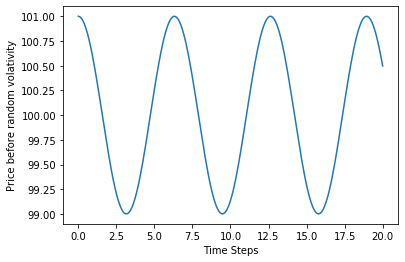

In [5]:
# initialize global variables
T = 20
dt = 0.1
N = round(T/dt)
t = np.linspace(0, T, N)
X0 = 50
cash0 = 1000
S0 = 100

# initialize securities number and price for each step
X = [X0] * N
cash = [cash0] * N
S_flat = [S0] * N
S_cos = S0 + np.cos(np.arange(0, T, dt))

plt.plot(t, S_cos)
plt.xlabel('Time Steps')
plt.ylabel('Price before random volativity')
plt.show()

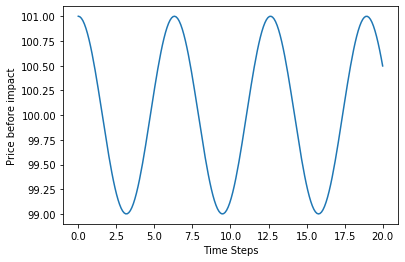

In [6]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, N - 1), 0, 0.0)

## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0

S_cos = [S_cos[i] + volativity_factor(volativity, xi[i]) for i in range(N)]

plt.plot(t, S_cos)
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

In [7]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

gamma = 0.01
epsilon = 0.1
eta = 0.1

In [8]:
class TestCase:
    def __init__(self, S_original):
        self.S = S_original.copy()
        self.n = np.zeros(np.shape(X))
        self.traders = []
    
    def add_trader(self, num, trader_type):
        if num == 0:
            return
        for i in range(num):
            self.traders.append(trader_type(X, cash))
    
    def get_trader(self, index):
        return self.traders[index]
            
    def update_price(self):
        step = 0
        for i in range(N):
            step = step + 1
            for trader in self.traders:
                trader.trade(self.S, i)
                self.n[i] += trader.get_stock()[i - 1] - trader.get_stock()[i]
            self.S[i] = self.S[i] - permanent_impact(self.n[i], gamma)
            
    def get_price(self):
        return self.S
    
    def get_stock_difference(self):
        return self.n
    
    def get_volatility(self):
        variance = np.square([x - np.average(self.S) for x in self.S])
        return math.sqrt(np.sum(variance) / (N - 1))
    
    def get_variance(self):
        return [self.S[i] - S[i] for i in range(N)]
    
    def plot_price(self):
        plt.plot(t, self.S)
        plt.xlabel('Time Steps')
        plt.ylabel('Price after impact')
        plt.show()

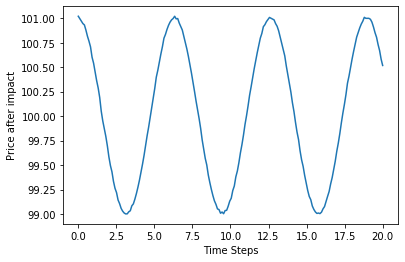

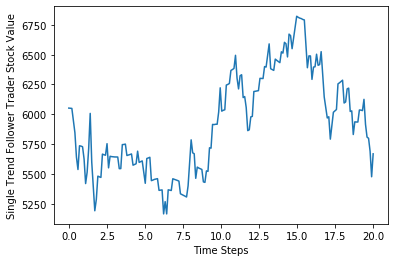

In [29]:
# test random trader
test = TestCase(S_cos)
test.add_trader(1, RandomTrader)
test.update_price()
test.plot_price()

trader = test.get_trader(0)
value = trader.get_value(test.get_price())
plt.plot(t, value)
plt.xlabel('Time Steps')
plt.ylabel('Single Trend Follower Trader Stock Value')
plt.show()

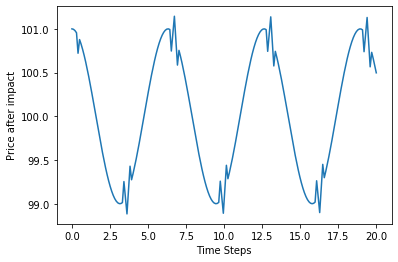

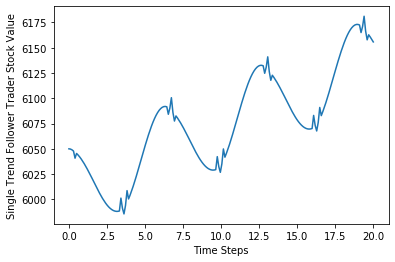

In [9]:
# robust test 1
test1 = TestCase(S_cos)
test1.add_trader(1, TrendFollower)
test1.update_price()
test1.plot_price()

trader = test1.get_trader(0)
value = trader.get_value(test1.get_price())
plt.plot(t, value)
plt.xlabel('Time Steps')
plt.ylabel('Single Trend Follower Trader Stock Value')
plt.show()

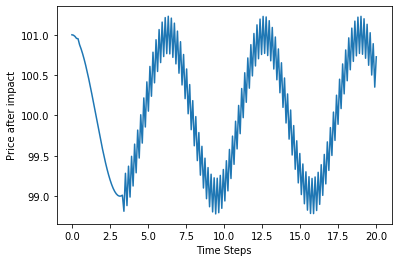

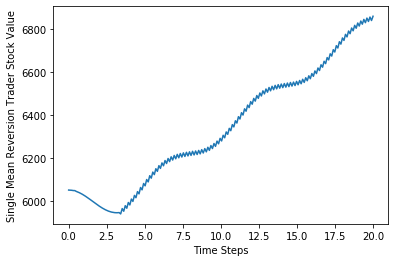

In [10]:
# test for mean reversion extreme trade
test2 = TestCase(S_cos)
test2.add_trader(1, MeanReversion)
test2.update_price()
test2.plot_price()

trader = test2.get_trader(0)
value = trader.get_value(test2.get_price())
plt.plot(t, value)
plt.xlabel('Time Steps')
plt.ylabel('Single Mean Reversion Trader Stock Value')
plt.show()

In [105]:
# test for mean reversion extreme trade
test_mr_1 = TestCase(S_cos)
test_mr_1.add_trader(1, MeanReversion)
test_mr_1.update_price()

trader = test_mr_1.get_trader(0)
differences1 = [abs(trader.get_stock()[i + 1] - trader.get_stock()[i]) for i in range(len(trader.get_stock()) - 1)]
differences1.insert(0, 0)

test_mr_2 = TestCase(S_cos)
test_mr_2.add_trader(2, MeanReversion)
test_mr_2.update_price()

trader = test_mr_2.get_trader(0)
differences2 = [abs(trader.get_stock()[i + 1] - trader.get_stock()[i]) for i in range(len(trader.get_stock()) - 1)]
differences2.insert(0, 0)

test_mr_3 = TestCase(S_cos)
test_mr_3.add_trader(3, MeanReversion)
test_mr_3.update_price()

trader = test_mr_3.get_trader(0)
differences3 = [abs(trader.get_stock()[i + 1] - trader.get_stock()[i]) for i in range(len(trader.get_stock()) - 1)]
differences3.insert(0, 0)

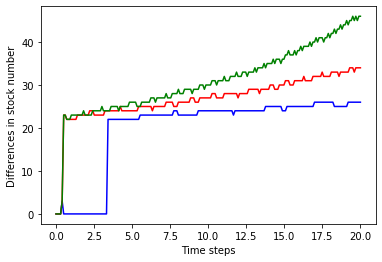

In [108]:
plt.plot(t, differences1, 'b', t, differences2, 'r', t, differences3, 'g')
plt.xlabel('Time steps')
plt.ylabel('Differences in stock number')
plt.show()

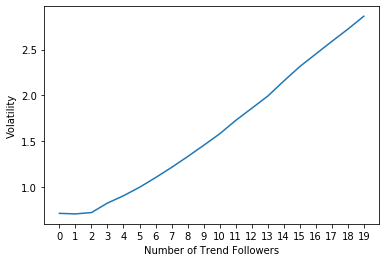

In [12]:
# test volatility
volatility = []
num_tf = [x for x in range(20)]

for i in range(20):
    volatility_test = TestCase(S_cos)
    volatility_test.add_trader(i, TrendFollower)
    volatility_test.update_price()
    volatility.append(volatility_test.get_volatility())
    
plt.plot(num_tf, volatility)
plt.xlabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.ylabel('Volatility')
plt.show()

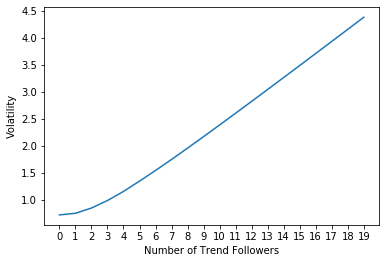

In [11]:
volatility = []
num_mr = [x for x in range(20)]

for i in range(20):
    volatility_test = TestCase(S_cos)
    volatility_test.add_trader(i, MeanReversion)
    volatility_test.update_price()
    volatility.append(volatility_test.get_volatility())
    
plt.plot(num_mr, volatility)
plt.xlabel('Number of Trend Followers')
plt.xticks(num_mr)
plt.ylabel('Volatility')
plt.show()

In [13]:
# 2D Volatility with Trend Follower and Mean Reversion
volatility_2d = np.zeros((20, 20))

num_tf = [x for x in range(20)]
num_mr = [x for x in range(20)]

for i in range(len(num_tf)):
    for j in range(len(num_mr)):
        volatility_2dtest = TestCase(S_cos)
        volatility_2dtest.add_trader(i, TrendFollower)
        volatility_2dtest.add_trader(j, MeanReversion)
        volatility_2dtest.update_price()
        volatility_2d[i][j] = volatility_2dtest.get_volatility()

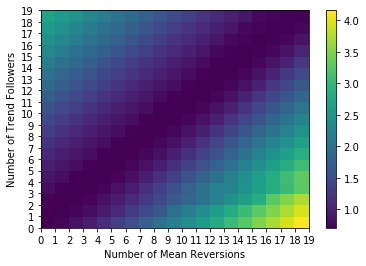

In [14]:
plt.pcolormesh(num_tf, num_mr, volatility_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

In [15]:
# 2D test with fixed total traders
num_traders = 20
fixed_2d = np.zeros((num_traders, num_traders))

for tf in range(num_traders):
    for mr in range(num_traders):
        if tf + mr >= num_traders - 1:
            break
        rt = num_traders - 1 - tf - mr
        fixed_2dtest = TestCase(S_cos)
        fixed_2dtest.add_trader(tf, TrendFollower)
        fixed_2dtest.add_trader(mr, MeanReversion)
        fixed_2dtest.add_trader(rt, RandomTrader)
        fixed_2dtest.update_price()
        fixed_2d[tf][mr] = fixed_2dtest.get_volatility()

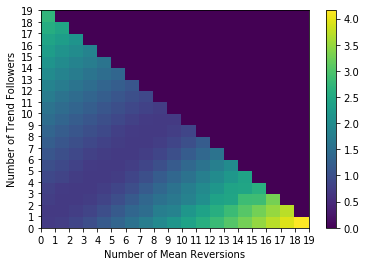

In [16]:
plt.pcolormesh(num_tf, num_mr, fixed_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

In [17]:
#2D test with fixed total traders up-filled by Random Traders
num_traders = 20
fixed_fill_2d = np.zeros((num_traders, num_traders))

for tf in range(num_traders):
    for mr in range(num_traders):
        rt = 38 - tf - mr
        fixed_fill_2dtest = TestCase(S_cos)
        fixed_fill_2dtest.add_trader(tf, TrendFollower)
        fixed_fill_2dtest.add_trader(mr, MeanReversion)
        fixed_fill_2dtest.add_trader(rt, RandomTrader)
        fixed_fill_2dtest.update_price()
        fixed_fill_2d[tf][mr] = fixed_fill_2dtest.get_volatility()

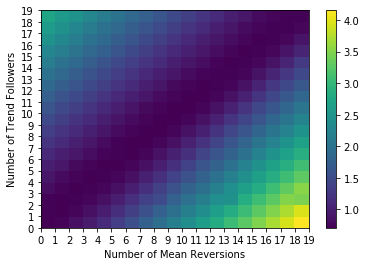

In [18]:
plt.pcolormesh(num_tf, num_mr, fixed_fill_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

In [19]:
num_tf = [x for x in range(20)]
num_mr = [x for x in range(20)]

In [26]:
#2d test with average price
average_price_2d = np.zeros((20, 20))

for i in range(len(num_tf)):
    for j in range(len(num_mr)):
        average_price_2dtest = TestCase(S_cos)
        average_price_2dtest.add_trader(i, TrendFollower)
        average_price_2dtest.add_trader(j, MeanReversion)
        average_price_2dtest.update_price()
        average_price_2d[i][j] = np.mean(average_price_2dtest.get_price()) - np.mean(S_cos)

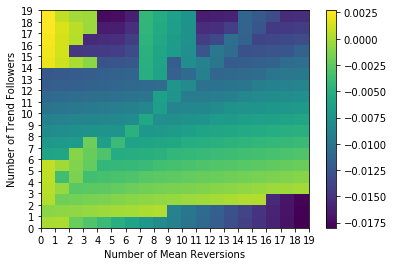

In [27]:
plt.pcolormesh(num_tf, num_mr, average_price_2d)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

In [30]:
#2d fixed test with average price
num_traders = 20
fixed_fill_2d_price_average = np.zeros((num_traders, num_traders))

for tf in range(num_traders):
    for mr in range(num_traders):
        rt = 38 - tf - mr
        fixed_fill_2dtest = TestCase(S_cos)
        fixed_fill_2dtest.add_trader(tf, TrendFollower)
        fixed_fill_2dtest.add_trader(mr, MeanReversion)
        fixed_fill_2dtest.add_trader(rt, RandomTrader)
        fixed_fill_2dtest.update_price()
        fixed_fill_2d_price_average[tf][mr] = np.mean(fixed_fill_2dtest.get_price()) - np.mean(S_cos)

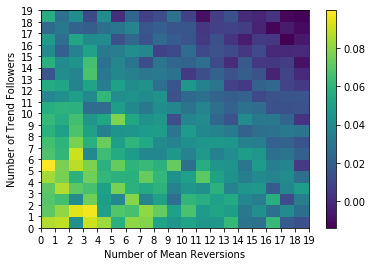

In [31]:
plt.pcolormesh(num_tf, num_mr, fixed_fill_2d_price_average)
plt.xlabel('Number of Mean Reversions')
plt.ylabel('Number of Trend Followers')
plt.xticks(num_tf)
plt.yticks(num_mr)
plt.colorbar()
plt.show()

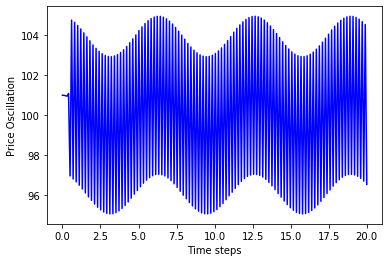

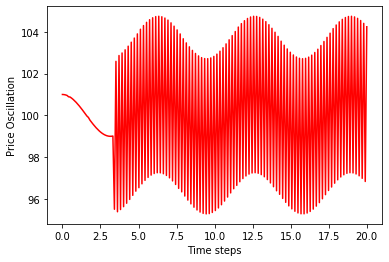

In [57]:
#Test change in the average price
test_tf_change1 = TestCase(S_cos)
test_tf_change1.add_trader(2, TrendFollower)
test_tf_change1.add_trader(19, MeanReversion)
test_tf_change1.update_price()
price_2tf = test_tf_change1.get_price()

test_tf_change2 = TestCase(S_cos)
test_tf_change2.add_trader(3, TrendFollower)
test_tf_change2.add_trader(19, MeanReversion)
test_tf_change2.update_price()
price_3tf = test_tf_change2.get_price()

plt.plot(t, price_2tf, 'b')
plt.xlabel('Time steps')
plt.ylabel('Price Oscillation')
plt.show()

plt.plot(t, price_3tf, 'r')
plt.xlabel('Time steps')
plt.ylabel('Price Oscillation')
plt.show()

In [58]:
tf_test_1 = test_tf_change1.get_trader(0)
mr_test_1 = test_tf_change1.get_trader(2)
tf_test_2 = test_tf_change2.get_trader(0)
mr_test_2 = test_tf_change2.get_trader(3)

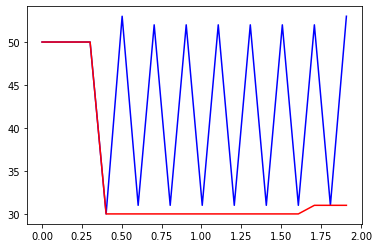

In [59]:
plt.plot(t[0:20], tf_test_1.get_stock()[0:20], 'b', t[0:20], tf_test_2.get_stock()[0:20], 'r')
plt.show()

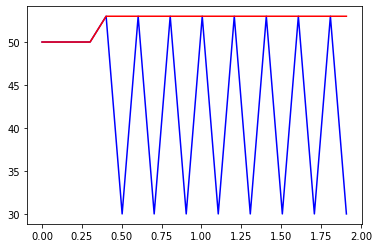

In [60]:
plt.plot(t[0:20], mr_test_1.get_stock()[0:20], 'b', t[0:20], mr_test_2.get_stock()[0:20], 'r')
plt.show()

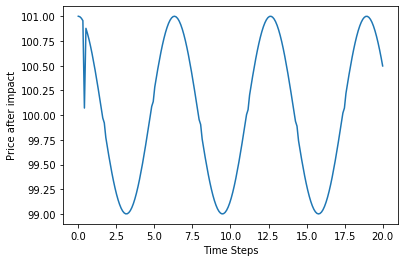

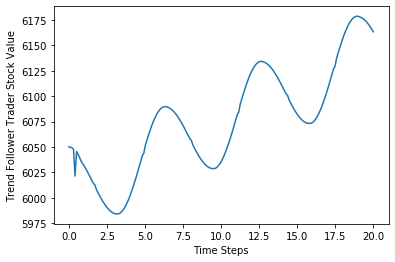

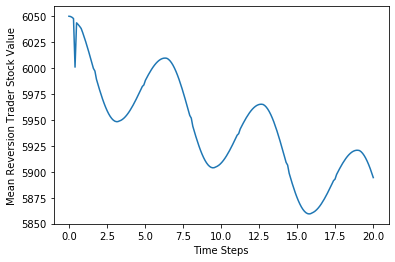

In [90]:
# robust correlation 
test_c = TestCase(S_cos)
test1.add_trader(5, TrendFollower)
test1.add_trader(5, MeanReversion)
test1.update_price()
test1.plot_price()

trader1 = test1.get_trader(0)
trader2 = test1.get_trader(-1)
value1 = trader1.get_value(test1.get_price())
value2 = trader2.get_value(test1.get_price())
plt.plot(t, value1)
plt.xlabel('Time Steps')
plt.ylabel('Trend Follower Trader Stock Value')
plt.show()
plt.plot(t, value2)
plt.xlabel('Time Steps')
plt.ylabel('Mean Reversion Trader Stock Value')
plt.show()